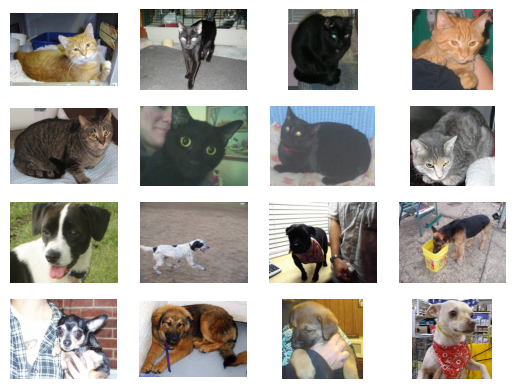

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


cat_dir = os.path.join('cat_dog/train/cats') 
dog_dir = os.path.join('cat_dog/train/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Splitting the data into training and testing sets Model training

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


base_dir_training = 'cat_dog/train'

train_datagen = image_dataset_from_directory(base_dir_training,
                                                  image_size=(200,200),
                                                  seed = 1,
                                                  batch_size= 32)
base_dir_test = 'cat_dog/test'
test_datagen = image_dataset_from_directory(base_dir_test,
                                                  image_size=(200,200),
                                                  seed = 1,
                                                  batch_size= 32)

Found 19989 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Creating model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')#output layer
    #activation sigmoid is used, because we require 1 out of 2 o/p, either cats or dogs
])


c:\Users\Pragati Aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation and trainig

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(train_datagen,
          epochs=15,
          validation_data=test_datagen)

Epoch 1/15


407/625 ━━━━━━━━━━━━━━━━━━━━ 1:49 501ms/step - accuracy: 0.5595 - loss: 0.7897

Prediction using external data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Dog


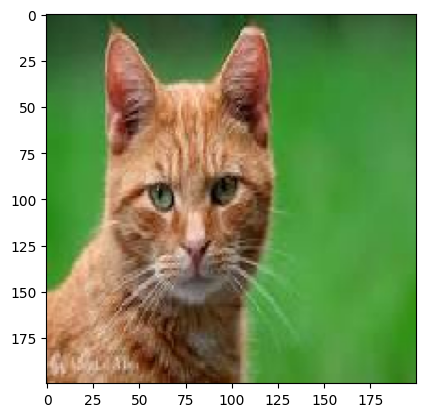

In [ ]:
from keras.preprocessing import image
import numpy as np

#Input image
test_image= image.load_img('test_img2.jpeg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image= image.img_to_array(test_image)
test_image= np.expand_dims(test_image,axis=0)

#Result array
result= model.predict(test_image)

#Mapping the result array with the main name list
if(result>0.5):
    print("Dog")
else:
    print("Cat")
